#### Reyhaneh Derafshi - 610396098
#### Data mining HW2


I used csv lib to read input files, sklearn metrics to report wanted parameters and sklean tree for decision tree implemenation.

In [1]:
import csv
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from sklearn.model_selection import train_test_split

### Reading Data

I read data with csv module and cast their values to floats. Then replace missing values with average values of the feature.  

In [2]:
def eliminate_missing_values(x, y):
    for col in range(8):
        feature_sum = sum(row[col] for row in x)
        feature_len = sum(1 if row[col] else 0 for row in x)
        feature_avg = feature_sum / feature_len
        for row in x: 
            if row[col] == 0:
                row[col] = feature_avg
    return x, y

def get_data(filename):
    data = csv.reader(open(filename))
    result = []
    for row in data:
        result.append(list(row))
    
    x, y = [], []
    for record in result[1:]:
        x_row = np.array(list(map(float, record[0: 8])))
        y_row = int(record[8])
        x.append(x_row)
        y.append(y_row)
    x, y = eliminate_missing_values(x, y)
    return x,y

Within this function we create our decision tree. 
I handled wanted algorithm by `criterion` attribute of decision tree (used `entropy` for C4.5).

In [3]:
def decision_algorithm(x_train, y_train, x_test, y_test, Classifier, name):
    classifier = Classifier(criterion="entropy")
    classifier.fit(x_train, y_train)
    y_prediction = classifier.predict(x_test)
    confusion_matrix_result = confusion_matrix(y_test, y_prediction)
    classification_result = classification_report(y_test, y_prediction)
    accuracy = accuracy_score(y_test, y_prediction)
    print(name)
    print("confusion matrix:", confusion_matrix_result, sep='\n')
    print("classification result:", classification_result, sep='\n')
    print("Accuracy:", accuracy)
    print('----------------------------------')
    plot_roc_curve(classifier, x_test, y_test)


C4.5 Decision Tree
confusion matrix:
[[128  40]
 [ 35  51]]
classification result:
              precision    recall  f1-score   support

           0       0.79      0.76      0.77       168
           1       0.56      0.59      0.58        86

    accuracy                           0.70       254
   macro avg       0.67      0.68      0.67       254
weighted avg       0.71      0.70      0.71       254

Accuracy: 0.7047244094488189
----------------------------------
Random Forest
confusion matrix:
[[135  33]
 [ 33  53]]
classification result:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       168
           1       0.62      0.62      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254

Accuracy: 0.7401574803149606
----------------------------------


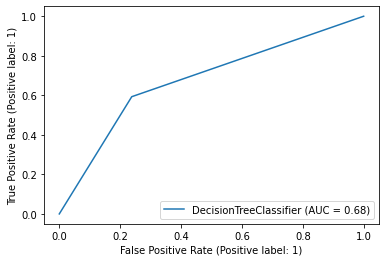

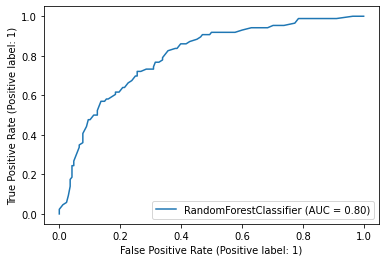

In [4]:
X, Y =  get_data('diabetes.csv')

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42) 
decision_algorithm(x_train, y_train, x_test, y_test, DecisionTreeClassifier, "C4.5 Decision Tree")
decision_algorithm(x_train, y_train, x_test, y_test, RandomForestClassifier, "Random Forest")

### Concolusion
It's clear that Random Forest algorithm has a better result. As we can see, Accuracy and AUC values are higher in random forest algorithm in comparison to decision tree algorithm.